<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/StreamTurbines/Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import pathlib, subprocess

def cmdcall( cmd ):
    output = subprocess.getoutput( cmd )
    print(output)

In [4]:
if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [31]:
def funcs( a ):
    p0m = a * ( +2.0 - a )
    p0p = a * ( -2.0 + 3.0 * a )
    V0 = ( 1.0 - a )
    V2 = ( 1.0 - 2.0 * a )
    Delta_p = p0m - p0p
    return Delta_p, p0m, p0p, V0, V2

In [32]:
num = 400
a_vec = np.linspace( 0, 0.5, num )
p0m_vec = np.zeros( num )
p0p_vec = np.zeros( num )
Delta_p_vec = np.zeros( num )
V0_vec = np.zeros( num )
V2_vec = np.zeros( num )

for i, a in enumerate( a_vec ):
    Delta_p_vec[i], p0m_vec[i], p0p_vec[i], V0_vec[i], V2_vec[i] = funcs( a )

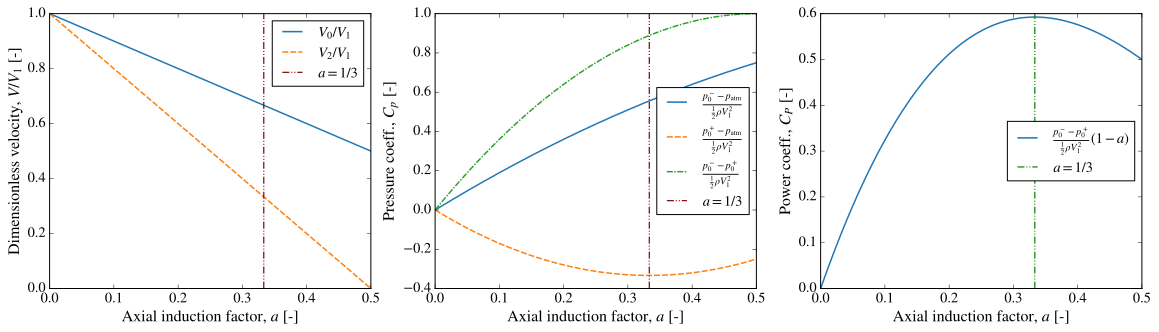

In [90]:
mpl.figure(1, figsize=(16,4.5))
mpl.subplots_adjust(left=0.04, bottom=0.12, right=0.99, top=0.97,
                    wspace=.2, hspace=None)

mpl.subplot(131)
mpl.plot( a_vec, V0_vec, label = '$V_0/V_1$' )
mpl.plot( a_vec, V2_vec, label = '$V_2/V_1$' )
mpl.axvline( 1.0/3.0, color='#800000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Dimensionless velocity, $V/V_1$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='upper right')

mpl.subplot(132)
mpl.plot( a_vec, p0m_vec, label = u'$\\frac{p_0^--p_\\mathrm{atm}}{\\frac{1}{2}\\rho V_1^2}$' )
mpl.plot( a_vec, p0p_vec, label = u'$\\frac{p_0^+-p_\\mathrm{atm}}{\\frac{1}{2}\\rho V_1^2}$' )
mpl.plot( a_vec, Delta_p_vec, label = u'$\\frac{p_0^--p_0^+}{\\frac{1}{2}\\rho V_1^2}$' )
mpl.axvline( 1.0/3.0, color='#800000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Pressure coeff., $C_p$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='center right')

mpl.subplot(133)
mpl.plot( a_vec, Delta_p_vec*(1.0-a_vec), label = u'$\\frac{p_0^--p_0^+}{\\frac{1}{2}\\rho V_1^2}(1-a)$' )
mpl.axvline( 1.0/3.0, color='#008000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Power coeff., $C_P$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='center right')

mpl.savefig( 'Variables.pdf')

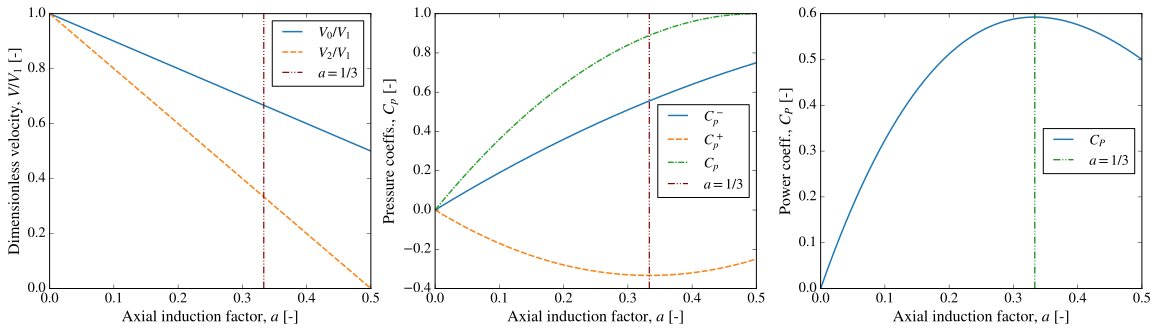

In [93]:
mpl.figure(1, figsize=(16,4.5))
mpl.subplots_adjust(left=0.04, bottom=0.12, right=0.99, top=0.97,
                    wspace=.2, hspace=None)

mpl.subplot(131)
mpl.plot( a_vec, V0_vec, label = '$V_0/V_1$' )
mpl.plot( a_vec, V2_vec, label = '$V_2/V_1$' )
mpl.axvline( 1.0/3.0, color='#800000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Dimensionless velocity, $V/V_1$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='upper right')

mpl.subplot(132)
mpl.plot( a_vec, p0m_vec, label = '$C_p^-$' )
mpl.plot( a_vec, p0p_vec, label = '$C_p^+$' )
mpl.plot( a_vec, Delta_p_vec, label = '$C_p$' )
mpl.axvline( 1.0/3.0, color='#800000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Pressure coeffs., $C_p$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='center right')

mpl.subplot(133)
mpl.plot( a_vec, Delta_p_vec*(1.0-a_vec), label='$C_P$' )
mpl.axvline( 1.0/3.0, color='#008000', dashes=(7,2,1,2,1,2), lw=1.2, label='$a=1/3$' )
mpl.ylabel( 'Power coeff., $C_P$ [-]' )
mpl.xlabel( 'Axial induction factor, $a$ [-]' )
mpl.legend( loc='center right')

mpl.savefig( 'Variables_V2.pdf')